In [120]:
# we are going to download and load a dataset from UCI repository:
# http://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data
import numpy as np
from urllib.request import urlopen

In [121]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data"
# download the file
raw_data = urlopen(url)
# load the CSV file as a numpy ndarray
dataset = np.loadtxt(raw_data, delimiter=",", dtype=str)

In [122]:
print (dataset.shape)

(90, 9)


In [123]:
# separate the data from the target attributes
X = dataset[:,0:89]
Y = dataset [:,8]

In [124]:
# Find all ?s, replace them with NaN
modified_X = np.copy(X)

In [125]:
modified_X[modified_X=='?']=np.nan

In [126]:
modified_X

array([['mid', 'low', 'excellent', 'mid', 'stable', 'stable', 'stable',
        '15', 'A'],
       ['mid', 'high', 'excellent', 'high', 'stable', 'stable', 'stable',
        '10', 'S'],
       ['high', 'low', 'excellent', 'high', 'stable', 'stable',
        'mod-stable', '10', 'A'],
       ['mid', 'low', 'good', 'high', 'stable', 'unstable', 'mod-stable',
        '15', 'A '],
       ['mid', 'mid', 'excellent', 'high', 'stable', 'stable', 'stable',
        '10', 'A'],
       ['high', 'low', 'good', 'mid', 'stable', 'stable', 'unstable',
        '15', 'S'],
       ['mid', 'low', 'excellent', 'high', 'stable', 'stable',
        'mod-stable', '05', 'S'],
       ['high', 'mid', 'excellent', 'mid', 'unstable', 'unstable',
        'stable', '10', 'S'],
       ['mid', 'high', 'good', 'mid', 'stable', 'stable', 'stable', '10',
        'S'],
       ['mid', 'low', 'excellent', 'mid', 'unstable', 'stable',
        'mod-stable', '10', 'S'],
       ['mid', 'mid', 'good', 'mid', 'stable', 'stable', '

In [127]:
#give labels for each axis in this dataset
import pandas as pd
df = pd.DataFrame(modified_X)
df.columns = ['L-CORE','L-SURF','L-O2','L-BP','SURF-STBL','CORE-STBL','BP-STBL','COMFORT','decision ADM-DECS']
df

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
5,high,low,good,mid,stable,stable,unstable,15,S
6,mid,low,excellent,high,stable,stable,mod-stable,05,S
7,high,mid,excellent,mid,unstable,unstable,stable,10,S
8,mid,high,good,mid,stable,stable,stable,10,S
9,mid,low,excellent,mid,unstable,stable,mod-stable,10,S


In [128]:
#replace string in the following three axis with numbers
size_mapping = {'low' :1, 'mid' : 2, 'high' : 3}
df['L-CORE']=df['L-CORE'].map(size_mapping)
df['L-SURF']=df['L-SURF'].map(size_mapping)
df['L-BP']=df['L-BP'].map(size_mapping)
df

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,2,1,excellent,2,stable,stable,stable,15,A
1,2,3,excellent,3,stable,stable,stable,10,S
2,3,1,excellent,3,stable,stable,mod-stable,10,A
3,2,1,good,3,stable,unstable,mod-stable,15,A
4,2,2,excellent,3,stable,stable,stable,10,A
5,3,1,good,2,stable,stable,unstable,15,S
6,2,1,excellent,3,stable,stable,mod-stable,05,S
7,3,2,excellent,2,unstable,unstable,stable,10,S
8,2,3,good,2,stable,stable,stable,10,S
9,2,1,excellent,2,unstable,stable,mod-stable,10,S


In [129]:
size_mapping={'good':1,'excellent':2,'fair':3,'poor':4}
df['L-O2']=df['L-O2'].map(size_mapping)
df

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,2,1,2,2,stable,stable,stable,15,A
1,2,3,2,3,stable,stable,stable,10,S
2,3,1,2,3,stable,stable,mod-stable,10,A
3,2,1,1,3,stable,unstable,mod-stable,15,A
4,2,2,2,3,stable,stable,stable,10,A
5,3,1,1,2,stable,stable,unstable,15,S
6,2,1,2,3,stable,stable,mod-stable,05,S
7,3,2,2,2,unstable,unstable,stable,10,S
8,2,3,1,2,stable,stable,stable,10,S
9,2,1,2,2,unstable,stable,mod-stable,10,S


In [130]:
size_mapping={'stable':1,'mod-stable':2,'unstable':3}
df['SURF-STBL']=df['SURF-STBL'].map(size_mapping)
df['CORE-STBL']=df['CORE-STBL'].map(size_mapping)
df['BP-STBL']=df['BP-STBL'].map(size_mapping)
df

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,2,1,2,2,1,1,1,15,A
1,2,3,2,3,1,1,1,10,S
2,3,1,2,3,1,1,2,10,A
3,2,1,1,3,1,3,2,15,A
4,2,2,2,3,1,1,1,10,A
5,3,1,1,2,1,1,3,15,S
6,2,1,2,3,1,1,2,05,S
7,3,2,2,2,3,3,1,10,S
8,2,3,1,2,1,1,1,10,S
9,2,1,2,2,3,1,2,10,S


In [131]:
size_mapping={'A':1,'I':2,'S':3}
df['decision ADM-DECS']=df['decision ADM-DECS'].map(size_mapping)
df

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,2,1,2,2,1,1,1,15,1.0
1,2,3,2,3,1,1,1,10,3.0
2,3,1,2,3,1,1,2,10,1.0
3,2,1,1,3,1,3,2,15,NaN
4,2,2,2,3,1,1,1,10,1.0
5,3,1,1,2,1,1,3,15,3.0
6,2,1,2,3,1,1,2,05,3.0
7,3,2,2,2,3,3,1,10,3.0
8,2,3,1,2,1,1,1,10,3.0
9,2,1,2,2,3,1,2,10,3.0


In [132]:
# Impute missing values with mean of the features
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 2.        ,  1.        ,  2.        ,  2.        ,  1.        ,
         1.        ,  1.        , 15.        ,  1.        ],
       [ 2.        ,  3.        ,  2.        ,  3.        ,  1.        ,
         1.        ,  1.        , 10.        ,  3.        ],
       [ 3.        ,  1.        ,  2.        ,  3.        ,  1.        ,
         1.        ,  2.        , 10.        ,  1.        ],
       [ 2.        ,  1.        ,  1.        ,  3.        ,  1.        ,
         3.        ,  2.        , 15.        ,  1.56179775],
       [ 2.        ,  2.        ,  2.        ,  3.        ,  1.        ,
         1.        ,  1.        , 10.        ,  1.        ],
       [ 3.        ,  1.        ,  1.        ,  2.        ,  1.        ,
         1.        ,  3.        , 15.        ,  3.        ],
       [ 2.        ,  1.        ,  2.        ,  3.        ,  1.        ,
         1.        ,  2.        ,  5.        ,  3.        ],
       [ 3.        ,  2.        ,  2.        ,  2.        ,  3

In [109]:
#give labels to dataset which switch string into numbers
df = pd.DataFrame(imputed_data)
df.columns = ['L-CORE', 'L-SURF', 'L-O2', 'L-BP','SURF-STBL','CORE-STBL','BP-STBL','COMFORT','decision ADM-DECS']
df

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,15.000000,1.000000
1,2.0,3.0,2.0,3.0,1.0,1.0,1.0,10.000000,3.000000
2,3.0,1.0,2.0,3.0,1.0,1.0,2.0,10.000000,1.000000
3,2.0,1.0,1.0,3.0,1.0,3.0,2.0,15.000000,1.561798
4,2.0,2.0,2.0,3.0,1.0,1.0,1.0,10.000000,1.000000
5,3.0,1.0,1.0,2.0,1.0,1.0,3.0,15.000000,3.000000
6,2.0,1.0,2.0,3.0,1.0,1.0,2.0,5.000000,3.000000
7,3.0,2.0,2.0,2.0,3.0,3.0,1.0,10.000000,3.000000
8,2.0,3.0,1.0,2.0,1.0,1.0,1.0,10.000000,3.000000
9,2.0,1.0,2.0,2.0,3.0,1.0,2.0,10.000000,3.000000


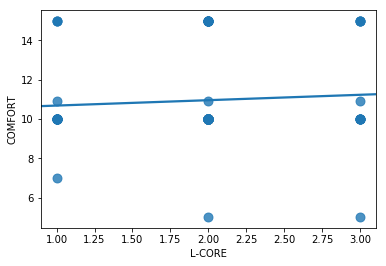

In [110]:
#draw a figure showing the relationship between L-core and comfort
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(df)
sns.regplot(x='L-CORE', y = 'COMFORT', data=df, ci=None, scatter_kws={'s':80})
plt.show()

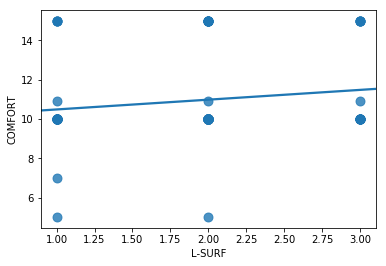

In [111]:
sns.regplot(x='L-SURF', y = 'COMFORT', data=df, ci=None, scatter_kws={'s':80})
plt.show()

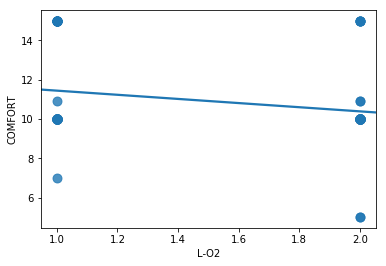

In [112]:
sns.regplot(x='L-O2', y = 'COMFORT', data=df, ci=None, scatter_kws={'s':80})
plt.show()

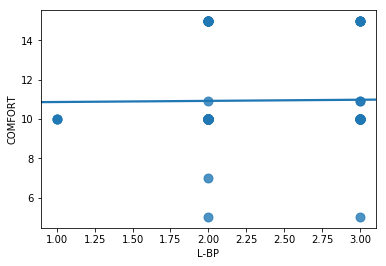

In [113]:
sns.regplot(x='L-BP', y = 'COMFORT', data=df, ci=None, scatter_kws={'s':80})
plt.show()

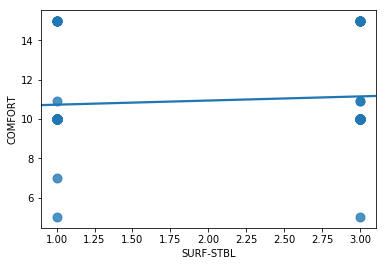

In [114]:
sns.regplot(x='SURF-STBL', y = 'COMFORT', data=df, ci=None, scatter_kws={'s':80})
plt.show()

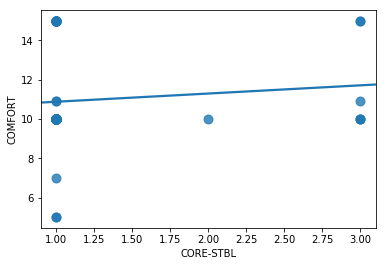

In [115]:
sns.regplot(x='CORE-STBL', y = 'COMFORT', data=df, ci=None, scatter_kws={'s':80})
plt.show()

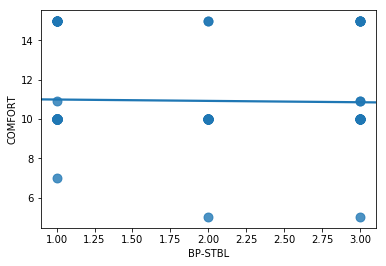

In [116]:
sns.regplot(x='BP-STBL', y = 'COMFORT', data=df, ci=None, scatter_kws={'s':80})
plt.show()

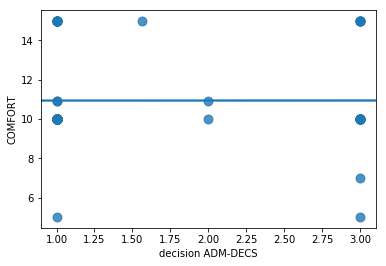

In [117]:
sns.regplot(x='decision ADM-DECS', y = 'COMFORT', data=df, ci=None, scatter_kws={'s':80})
plt.show()